<a href="https://colab.research.google.com/github/pyjanvi/Clustering-customer-review-for-market-Research/blob/main/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
customer_data = pd.read_csv('customer_review_clusters_named.csv')
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",I have installed this in my kitchen working fi...


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(customer_data['review_content'])
X.shape

(1465, 5000)

In [36]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=6, random_state=42)

In [37]:
import numpy as np

terms = tfidf.get_feature_names_out()

for i in range(6):
    print(f"\nCluster {i}:")
    centroid = kmeans.cluster_centers_[i]
    top_terms = centroid.argsort()[-10:]
    print([terms[j] for j in top_terms])


Cluster 0:
['is', 'product', 'amazon', 'good', 'media', 'https', 'com', 'jpg', '_sy88', 'images']

Cluster 1:
['but', 'tv', 'quality', 'for', 'product', 'and', 'it', 'is', 'the', 'good']

Cluster 2:
['to', 'for', 'fast', 'good', 'is', 'and', 'it', 'the', 'charging', 'cable']

Cluster 3:
['this', 'to', 'good', 'and', 'for', 'is', 'it', 'keyboard', 'the', 'mouse']

Cluster 4:
['use', 'easy', 'for', 'good', 'product', 'and', 'is', 'the', 'to', 'it']

Cluster 5:
['in', 'of', 'good', 'this', 'for', 'to', 'it', 'and', 'is', 'the']


In [40]:
customer_data = pd.read_csv('customer_review_clusters.csv')
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4
...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3


In [41]:
customer_data.groupby('cluster').size()

,0
cluster,
0,97
1,469
2,143
3,375
4,129
5,252


In [42]:
cluster_names = {
    0: "Smartwatch & Features",
    1: "General Product Satisfaction",
    2: "Phone Performance & Charging",
    3: "Home Appliances & Heating",
    4: "Cable / Charger Quality",
    5: "Audio & Value for Money"
}

customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster,cluster_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2,Phone Performance & Charging
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4,Cable / Charger Quality
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3,Home Appliances & Heating
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2,Phone Performance & Charging
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4,Cable / Charger Quality
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1,General Product Satisfaction
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3,Home Appliances & Heating
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3,Home Appliances & Heating
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3,Home Appliances & Heating


In [43]:
customer_data['cluster'].value_counts()

,count
cluster,
1,469
3,375
5,252
2,143
4,129
0,97


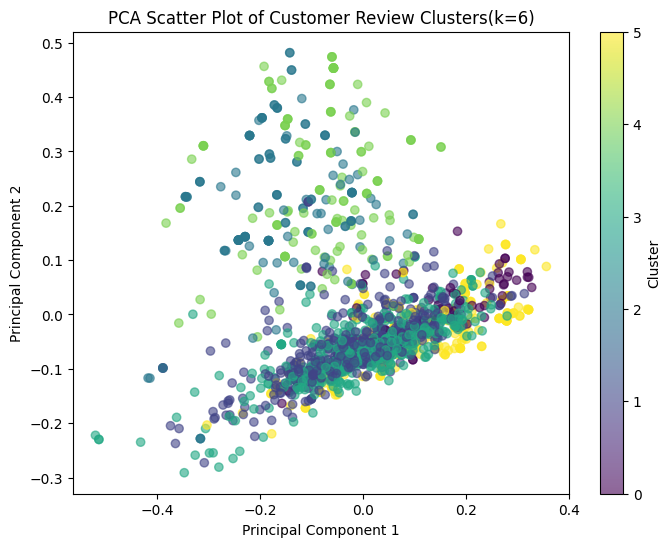

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=customer_data['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot of Customer Review Clusters(k=6)")
plt.colorbar(scatter, label='Cluster')
plt.show()

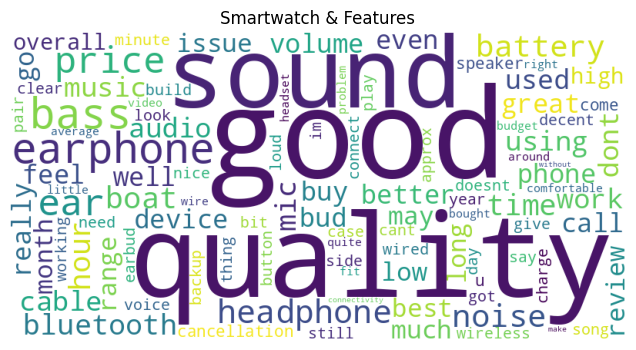

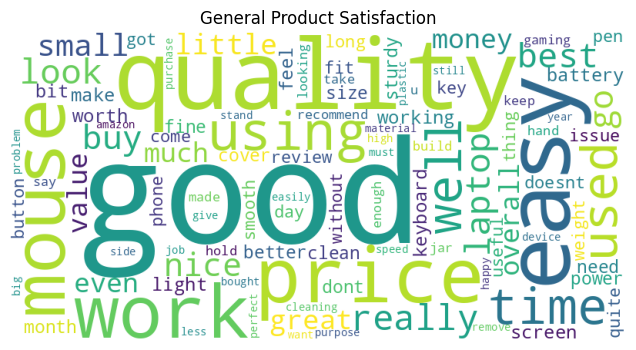

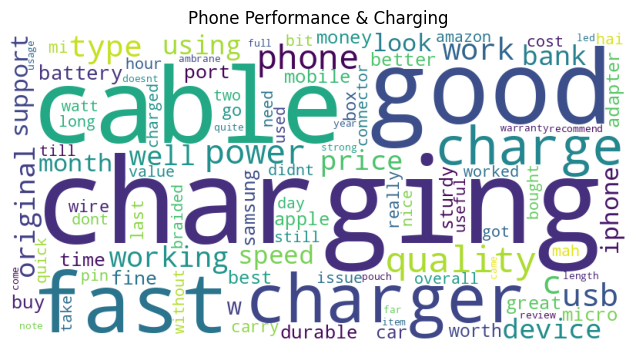

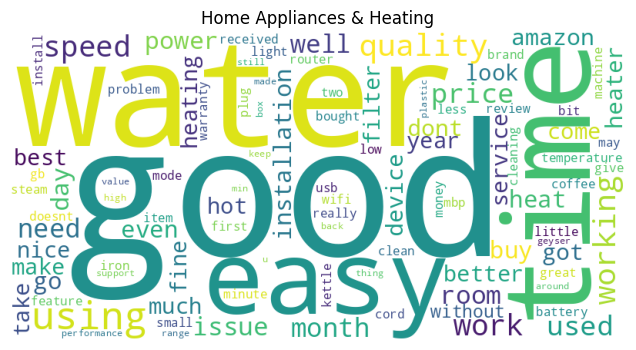

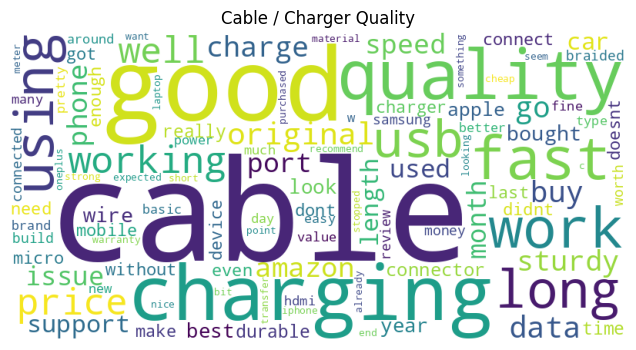

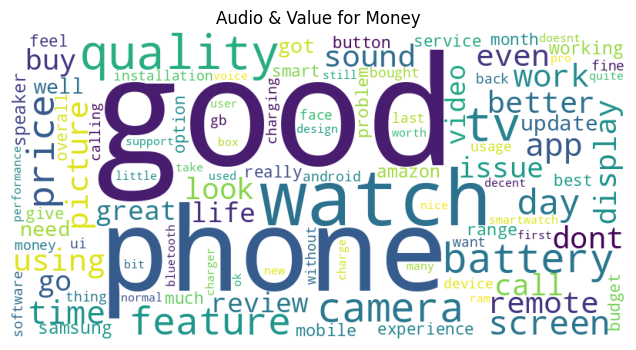

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['aa', 'one', 'use', 'product'])  # optional domain words

for i in sorted(customer_data['cluster'].unique()):
    text = " ".join(customer_data[customer_data['cluster'] == i]['review_content'])

    wc = WordCloud(
        background_color='white',
        stopwords=custom_stopwords,
        max_words=100,
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(customer_data[customer_data['cluster'] == i]['cluster_name'].iloc[0])
    plt.show()

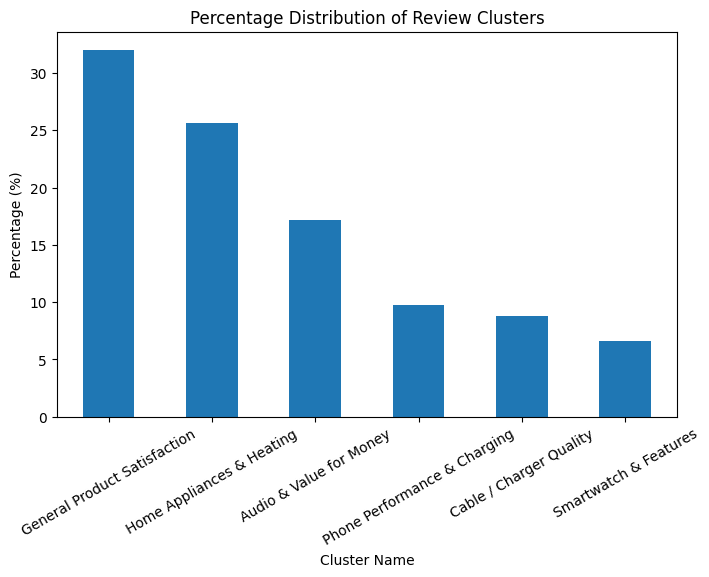

In [53]:
cluster_percent = customer_data['cluster_name'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
cluster_percent.plot(kind='bar')

plt.title("Percentage Distribution of Review Clusters")
plt.xlabel("Cluster Name")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)

plt.show()

In [54]:
customer_data['rating'].dtype

dtype('O')

In [57]:
customer_data['rating'] = pd.to_numeric(customer_data['rating'], errors='coerce')
customer_data['rating'].dtype

dtype('float64')

In [58]:
customer_data=customer_data.dropna(subset=['rating'])
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster,cluster_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2,Phone Performance & Charging
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4,Cable / Charger Quality
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3,Home Appliances & Heating
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2,Phone Performance & Charging
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4,Cable / Charger Quality
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1,General Product Satisfaction
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3,Home Appliances & Heating
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3,Home Appliances & Heating
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3,Home Appliances & Heating


<Figure size 1200x600 with 0 Axes>

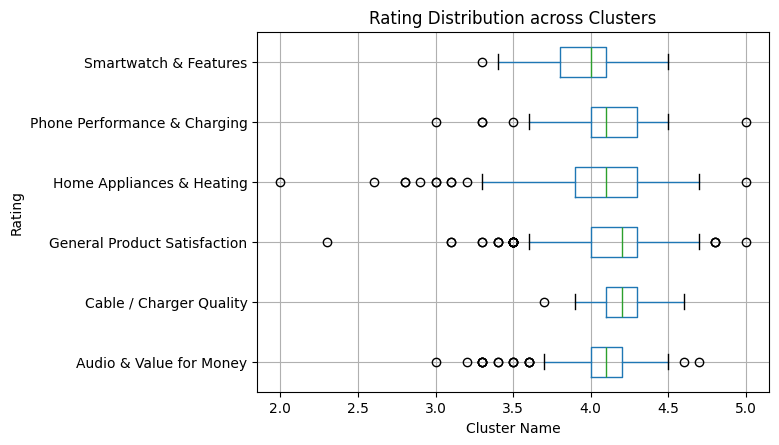

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
customer_data.boxplot(column='rating', by='cluster_name', vert=False)

plt.title("Rating Distribution across Clusters")
plt.suptitle("")
plt.xlabel("Cluster Name")
plt.ylabel("Rating")

plt.show()